# Úvod

### Jak počítač rozumí tomu, co naprogramujeme?

Odpověď na tuto otázku není stejná pro všechny programovací jazyky. Zjednodušeně rozlišujeme dva druhy, **nízkoúrovňové** (C, assembler) a **vysokoúrovňové** (python, R).

Program v napsaný v nízkoúrovňovém jazyce se spouští takto:

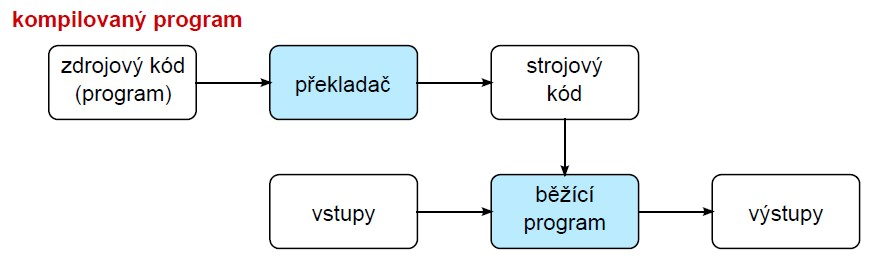


Program napsaný ve vysokoúrovňovém jazyce se spouští takto:

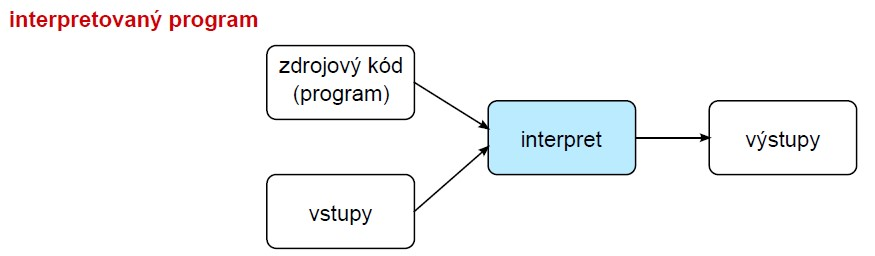

### Co potřebujeme k tomu, abychom začali programovat v pythonu?

Potřebujeme samozřejmě nainstalovat vhodnou verzi pythonu a nějaké vývojové prostředí. Když "instalujeme  python", vlastně tím instalujeme interpret, software, který přeloží náš zdrojový kód do strojového a vytvoří tím běžící program.

A jaké máme možnosti ohledně vývojového prostředí?


*   IDLE
*   PyCharm
*   VS Code
*   pro fajnšmekry třeba poznámkový blok 😀

Ale neexistuje nějaké jednodušší řešení? Kde nemusíme nic instalovat? Kde můžeme na kódu spolupracovat s více lidmi? A kde nebudeme závislí na našem hardware?



### Jupyter notebook a Google Colab



*   webové sdílené prostředí
*   ju-pyt-er: Julia, Python, R (ale dnes už více jazyků)

**Výhody**
*   nezávislost na hardware (machine learning)
*   sdílení kódu
*   možnost formátování, vkládání textu, LaTex vzorců a obrázků (ideální pro výuku)
*   propojení s GitHubem


**Nevýhody**
*   občas horší ovládání (oproti PyCharmu)
*   po hodině neaktivity vás odpojí
*   na některé věci může být pomalejší
*   nutnost připojení k internetu

**Výhody pythonu**

*   příjemná syntaxe
*   open source a velmi používaný (dostupné knihovny)
*   interpretovaný jazyk a jeho rychlost
*   zvládá zpracovat hodně dat
*   rozumí mu každý

# Cvičení: Titanic

Stáhneme si dataset z Kagglu: https://www.kaggle.com/competitions/titanic/data

Naším úkolem bude na základě informací o pasažérech predikovat, jestli plavbu přežili nebo ne.

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = '' # TODO: Add your Kaggle username
os.environ['KAGGLE_KEY'] = '' # TODO: Add your Kaggle key

DATASET = 'titanic'

!kaggle competitions download -c {DATASET} -p {'.'}

In [ ]:
import zipfile
import pandas as pd

dataset_path = '/content/data_preparation_exercise/'


with zipfile.ZipFile(DATASET + '.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)


csv_filepath = dataset_path + 'train.csv'
df = pd.read_csv(csv_filepath)
df

## První pohled na data

Prozkoumejte dataset. Kolik obsahuje proměnných a záznamů? Co udávají jednotlivé proměnné a jaké mají datové typy? Obsahuje nějaké duplicitní nebo chybějící hodnoty?



In [ ]:
# TODO

Podívejte se na chybějící hodnoty - nachází se pouze u proměnných `Age`, `Cabin` a `Embarked`.
Co s nimi? Použijte funkce `isna()` a `fillna()`.



In [ ]:
# TODO

## Deskriptnívní statistiky a vizualizace

Podívejte se na stukturu dat. Pro každou proměnnou vykreslete odpovídající graf a spočítejte žádoucí deskriptivní statistiky.

Užitečnou funkcí bude `value_counts()`, na vykreslování použijte knihovnu `matplotlib` a funkce `bar()`, `hist()` a `boxplot()`.



In [ ]:
import matplotlib.pyplot as plt
from numpy import mean, var, median

In [ ]:
# TODO

## Logistická regrese

Teď už můžeme přejít k našemu úkolu - predikovat, zda pasažér plavbu přežije. Vyzkoušíme si jednoduchou metodu, kteoru všichni dobře známe -- **logistickou regresi**.

Nejprve si musíme rozmyslet, jaké proměnné chceme k regresi používat. Není úplně předmětem tohoto cvičení zabývat se vhodným výběrem regresorů, takže vyberte klidně nějakým odborným tipem. Určitě je ale potřeba se zamyslet, co v tomto případě s kategoriálními proměnnými jako je například `Embarked`. Je třeba vytvořit z ní tzv. **dummy proměnnou**. S tím nám naštěstí pomůže funkce `get_dummies()` z knihovny `pandas`, která funguje následovně.



In [ ]:
import pandas as pd
dummy = pd.get_dummies(df['Embarked'])
print(dummy)

Vytvořte novou proměnnou `y` do které uložíte proměnnou `Survived`. Dále vytvořte novou proměnnou `x`, a do ní uložte proměnné, které chcete použít k regresi. Pokud je to potřeba, vytvořte dummy proměnné.

In [ ]:
# TODO

Teď už můžeme zkusit pracovat na našem modelu. Rozdělíme náš dataset na testovací a trénovací část a použijeme funkce z knihovny `sklearn`.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [ ]:
# intercept a koeficienty modelu

print(model.intercept_)
print(model.coef_)

In [ ]:
# predikce pro jednotlivá pozorování

model.predict(x)

In [ ]:
# jejich pravděpodobnosti

model.predict_proba(x)

In [ ]:
# podíl správně ohodnocených pozorování

model.score(x, y)

In [ ]:
# confusion matrix

confusion_matrix(y, model.predict(x))

In [ ]:
# souhrnne info

classification_report(y, model.predict(x))